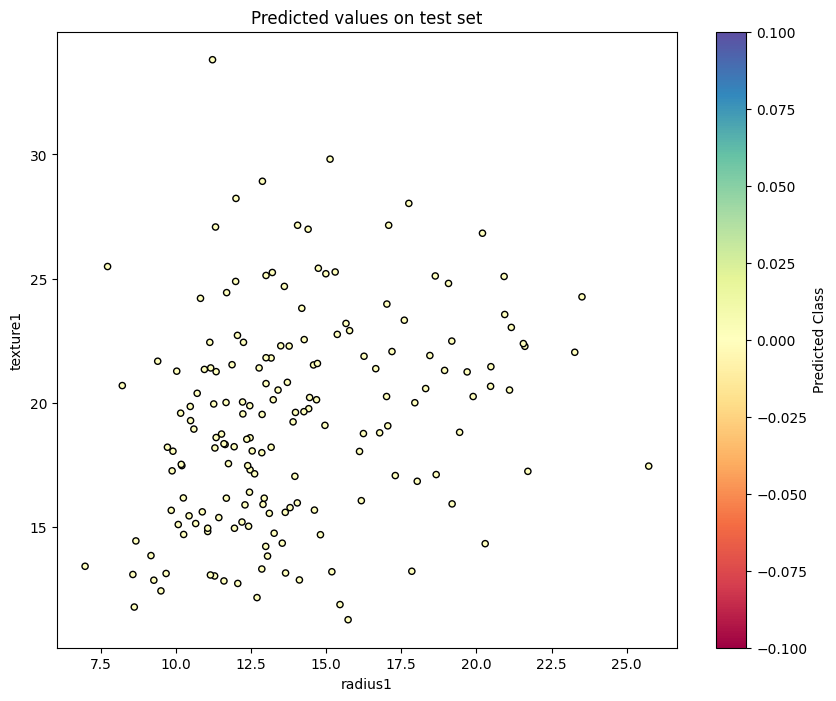

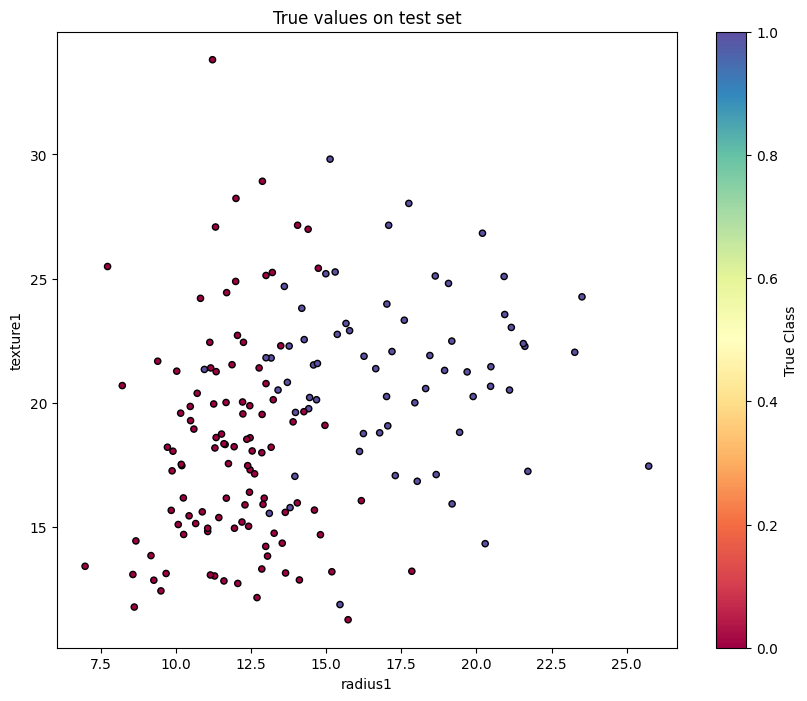

Confusion Matrix:


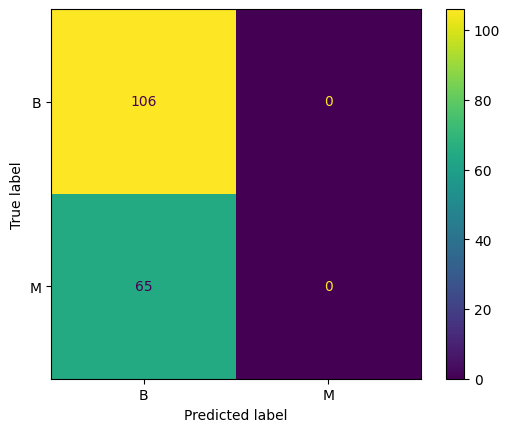

Precision: 61.98830409356725
Accuracy: 61.98830409356725


In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, classification_report
import pandas as pd

# Load the dataset
cancer = pd.read_csv('data4.csv')

# Extract features (columns from the third column onwards) and target variable (second column)
X = cancer.iloc[:, 2:].values
y = cancer.iloc[:, 1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Convert categorical target variable to numeric
# Assuming 'M' is 1 and 'B' is 0
y_numeric_pred = (y_pred == 'M').astype(int)
y_numeric_test = (y_test == 'M').astype(int)

# Plot predicted values
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_numeric_pred, s=20, edgecolors="k", cmap=plt.cm.Spectral)
plt.xlabel('radius1')
plt.ylabel('texture1')
plt.title("Predicted values on test set")
plt.colorbar(label='Predicted Class')
plt.show()

# Plot true values
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_numeric_test, s=20, edgecolors="k", cmap=plt.cm.Spectral)
plt.xlabel('radius1')
plt.ylabel('texture1')
plt.title("True values on test set")
plt.colorbar(label='True Class')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_numeric_test, y_numeric_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['B', 'M'])
disp.plot()
plt.show()
# Precision and Accuracy
precision = precision_score(y_test, y_pred, pos_label='B', average='binary', zero_division=0)
print("Precision:", 100 * precision)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", 100 * accuracy)